In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_curve, auc, classification_report,accuracy_score,precision_score,f1_score,recall_score,cohen_kappa_score,multilabel_confusion_matrix,make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# load data 
dataframe = pd.read_excel(r'C:\Users\dawns\Desktop\Master thesis\data\Dataset_Total.xlsx',index_col=None, header=0)
dataframe


,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3
...,...,...,...,...,...,...
3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1
3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1
3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1
3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1


In [3]:
# 分词后总词汇数  Number of tokens   
Tokens = pd.DataFrame()
for i in dataframe['CONTENT_NEW'].index:
    Single_text = dataframe['CONTENT_NEW'][i]
    Single_text = re.sub('\W*', '',''.join(Single_text))
    Single_text = str(Single_text)
    Single_text = list(jieba.cut(Single_text))
    #print(Single_text)
    #print(len(Single_text))
    Tokens = Tokens.append(pd.DataFrame({len(Single_text)}),ignore_index=True)
dataframe['Tokens'] = Tokens 


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dawns\AppData\Local\Temp\jieba.cache
Loading model cost 0.676 seconds.
Prefix dict has been built successfully.
C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/2305750726.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tokens = Tokens.append(pd.DataFrame({len(Single_text)}),ignore_index=True)


In [4]:
dataframe.head()

,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186


In [5]:
# load connective corpus
data = pd.read_excel(r'C:\Users\dawns\Desktop\Master thesis\data\connectives corpus simplify.xlsx',index_col=None,header=0)
list1 = data.values.tolist()
a = np.array(list1)
#list1   
# flatten,remove nan and punction
list2 = a.flatten()
list2 = list2.tolist()
while 'nan' in list2:
    list2.remove('nan')
# list2
#list3 = re.sub('\W*', '',''.join(list2))   #Finally find that do not need to resub punctuation.
#list3
#list4=list(jieba.cut(list3,use_paddle=True))
#will not use jieba.cut for connectives_corpus since that will cause mistake in those two words"反之”“所以”.
connective_list=list2
print(connective_list)
print('Number of connective words dictionary:',len(connective_list))   

['跟', '便', '并', '既然', '不是', '果然', '像', '即使', '别说', '凡是', '免得', '除了', '和', '此外', '并非', '加上', '便是', '果真', '好比', '即令', '并且', '方才', '以免', '除开', '还有', '而', '诚然', '加以', '乃是', '假如', '如同', '尽管', '不单', '除非', '为的是', '到底', '或者', '刚', '但', '结果', '还是', '假若', '似乎', '尽管如此', '不但', '只要', '为了', '反正', '及', '换言之', '但是', '因为', '或', '假使', '等于', '就是', '而且', '不管', '一来', '不然', '既', '即', '虽然', '看样子', '或是', '如果', '不如', '就算', '不光', '任凭', '一则', '单', '连', '继而', '反倒', '然则', '宁', '如', '不及', '哪怕', '不仅', '无论', '以便', '综上所述', '一方面', '接着', '反而', '所以', '宁可', '若', '不比', '愈', '何况', '终归', '以防', '由此可见', '且', '进而', '反之', '惟其', '宁肯', '设若', '固然', '不惟', '终究', '免得', '也就是说', '时而', '紧接着', '否则', '惟有', '宁愿', '倘若', '纵然', '不仅仅', '总归', '省得', '总之', '同时', '就', '可是', '幸而', '绝不', '倘', '而况', '不论', '以免', '起先', '同样', '可见', '可惜', '才', '抑或', '倘使', '非但', '为', '譬如', '一边', '另外', '明明', '幸好', '毋宁', '万一', '况且', '起初', '一会', '每当', '明知', '幸亏', '兴许', '要不是', '尚且', '后来', '一面', '每逢', '其实', '以至于', '许是', '一旦', '光', '例如', '以及', '乃', '恰恰相反', '以至', '要不然', '要是', '甚至

In [6]:
# 连词数 Number of connective words
dataframe['words_detailed'] = dataframe['LEVEL']
dataframe['connective_numbers'] = dataframe['LEVEL']
#words_eachtext = pd.DataFrame()
for i in dataframe['WORDCUT'].index:
    Single_text = dataframe['WORDCUT'][i]
    Single_text = re.sub('\W*', '',Single_text)
    Single_text=list(jieba.cut(Single_text))
    Single_text='|'.join(Single_text)
    Single_text=Single_text.split('|')
    Match_result = [o for o in Single_text if o in connective_list]
    dataframe['connective_numbers'][i] = len(Match_result)
    dataframe['words_detailed'][i] = Match_result

C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/2988155540.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['connective_numbers'][i] = len(Match_result)
C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/2988155540.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['words_detailed'][i] = Match_result


<AxesSubplot:xlabel='connective_numbers', ylabel='SCORE'>

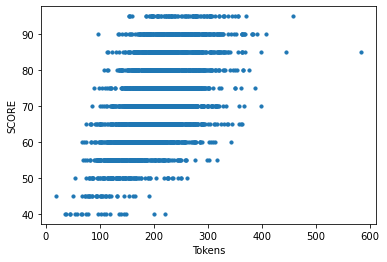

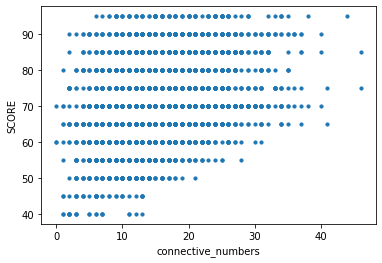

In [7]:
features_set1 = dataframe.copy()
features_set1
features_set1.plot.scatter(x = 'Tokens', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'connective_numbers', y = 'SCORE', s=10)

In [8]:
dataframe

,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,words_detailed,connective_numbers
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,"[为了, 而, 便, 如, 为了, 为了, 便, 因, 与, 甚至, 像, 由, 就, 像,...",23
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,"[及, 并, 及, 由于, 及, 而, 由, 为, 与, 及]",10
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,"[便, 虽然, 但, 就, 为, 与, 不是, 还是, 因此, 与, 便, 每当, 加以, ...",22
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,"[不是, 只是, 因此, 和, 如果, 由, 偏偏, 要不然, 为, 而, 但, 为, 首先...",23
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,"[既, 与其, 既, 为, 但, 另外, 如果, 于是, 另外, 所以, 只有, 才, 还是...",18
...,...,...,...,...,...,...,...,...,...
3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,"[但是, 和, 但是, 但, 但, 虽然, 还是, 虽然, 但是]",9
3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,"[就是, 因为, 以, 又, 所以, 而且, 但, 由于, 和, 一方面, 一方面, 还是,...",17
3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,"[与, 如果, 所以, 和, 又, 而, 还有, 而, 而且, 但, 然后, 为, 不及]",13
3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,"[虽, 但是, 如, 由于, 而, 如果, 和, 就, 但是, 不仅, 甚至, 由, 以, ...",28


In [9]:
dataframe['words_detailed'][0]

['为了',
 '而',
 '便',
 '如',
 '为了',
 '为了',
 '便',
 '因',
 '与',
 '甚至',
 '像',
 '由',
 '就',
 '像',
 '就',
 '因',
 '只有',
 '才',
 '为',
 '为',
 '为',
 '以',
 '结果']

In [10]:
# 六个连词等级
# Find the amount of connectives in every words level 
Words_level = pd.read_excel(r"C:\Users\dawns\Desktop\Master thesis\data\level of connective words.xlsx",index_col=None, header=0)
#Words_level
levels = ['First','Second','Third','Fourth','Fifth','Sixth','others']

Sum_wordlevel = []
for level in levels:
    level_list1 = Words_level[level].values.tolist()
    level_list1 = [str(x) for x in level_list1]
    while 'nan' in level_list1:
        level_list1.remove('nan')
    print(level_list1)
list1=['和']
list1


['和']
['因为', '所以', '虽然', '但是', '就']
['像', '终于', '其实', '除了', '一边', '然后', '先', '如果', '或者', '跟', '不但', '而且', '只有', '才', '还是', '为了', '又', '一会', '后来', '特别', '不比', '不是', '就是']
['与', '连', '因此', '既然', '只要', '不管', '尽管', '然而', '即使', '于是', '由于', '无论', '要是', '而', '接着', '否则', '并且', '到底', '刚', '结果', '可是', '同时', '可惜', '另外', '光', '例如', '却', '其次', '甚至', '其中', '尤其', '首先', '只好', '不仅', '不论']
['总之', '至于', '则', '从而', '反而', '因而', '与其', '宁可', '除非', '何况', '便', '要不', '不如', '果然', '假如', '似乎', '也要', '要不然', '反正', '等于', '不然', '哪怕', '可见', '幸亏', '万一', '以及', '一旦', '据说', '无奈', '总算']
['时而', '进而', '况且', '尚且', '并非', '以至', '凡是', '宁肯', '以便', '以免', '免得', '此外', '固然', '倘若', '即便', '愈', '终究', '以至于', '只不过', '反之', '宁愿', '譬如', '明明', '起初', '唯独', '随即', '偏偏', '不料', '比方']
['并', '别说', '加上', '便是', '果真', '好比', '即令', '方才', '除开', '还有', '诚然', '加以', '乃是', '如同', '不单', '为的是', '但', '假若', '尽管如此', '及', '换言之', '或', '一来', '既', '即', '看样子', '或是', '假使', '就算', '不光', '任凭', '一则', '单', '继而', '反倒', '然则', '宁', '不及', '综上所述', '一方面', '终归', '以防', '由此可见', '且', '惟其

['和']

In [11]:
list1=['和']
list2=['因为', '所以', '虽然', '但是', '就']
list3=['像', '终于', '其实', '除了', '一边', '然后', '先', '如果', '或者', '跟', '不但', '而且', '只有', '才', '还是', '为了', '又', '一会', '后来', '特别', '不比', '不是', '就是']
list4=['与', '连', '因此', '既然', '只要', '不管', '尽管', '然而', '即使', '于是', '由于', '无论', '要是', '而', '接着', '否则', '并且', '到底', '刚', '结果', '可是', '同时', '可惜', '另外', '光', '例如', '却', '其次', '甚至', '其中', '尤其', '首先', '只好', '不仅', '不论']
list5=['总之', '至于', '则', '从而', '反而', '因而', '与其', '宁可', '除非', '何况', '便', '要不', '不如', '果然', '假如', '似乎', '也要', '要不然', '反正', '等于', '不然', '哪怕', '可见', '幸亏', '万一', '以及', '一旦', '据说', '无奈', '总算']
list6=['时而', '进而', '况且', '尚且', '并非', '以至', '凡是', '宁肯', '以便', '以免', '免得', '此外', '固然', '倘若', '即便', '愈', '终究', '以至于', '只不过', '反之', '宁愿', '譬如', '明明', '起初', '唯独', '随即', '偏偏', '不料', '比方']
list7=['并', '别说', '加上', '便是', '果真', '好比', '即令', '方才', '除开', '还有', '诚然', '加以', '乃是', '如同', '不单', '为的是', '但', '假若', '尽管如此', '及', '换言之', '或', '一来', '既', '即', '看样子', '或是', '假使', '就算', '不光', '任凭', '一则', '单', '继而', '反倒', '然则', '宁', '不及', '综上所述', '一方面', '终归', '以防', '由此可见', '且', '惟其', '如', '不惟', '也就是说', '紧接着', '惟有', '若', '纵然', '不仅仅', '总归', '省得', '幸而', '绝不', '设若', '而况', '起先', '同样', '抑或', '非但', '幸好', '毋宁', '倘', '每当', '明知', '兴许', '倘使', '一面', '每逢', '许是', '乃', '恰恰相反', '要不是', '甚至于', '就是说', '乃至', '因', '抑', '再则', '再说', '虽', '与其说', '或者说', '同', '随后', '要么', '之所以', '遂', '是因为', '所谓', '怨不得', '只得', '旋即', '岂知', '只是']

In [12]:
#每篇文章连词等级 connective words level 
dataframe['level1_tokens'] = dataframe['LEVEL']
for i in dataframe['words_detailed'].index:
    Single_text = dataframe['words_detailed'][i]
    l1 =[]
    #print(Single_text)
    for word in Single_text: #遍历句子中每个词
        if word in list1: #如果该词在1等级连词里
            l1.append(word)
        if l1 == []:
            dataframe['level1_tokens'][i] = '0'
    dataframe['level1_tokens'][i] =l1
dataframe['level1_tokens'] = dataframe['level1_tokens'].str.len()
#dataframe






C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/2652795234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['level1_tokens'][i] = '0'


In [13]:
# 分别计算文章中六个等级的连词
dataframe['level2_tokens'] = dataframe['LEVEL']
for i in dataframe['words_detailed'].index:
    Single_text = dataframe['words_detailed'][i]
    l2 =[]
    #print(Single_text)
    for word in Single_text: #遍历句子中每个词
        if word in list2: #如果该词在1等级连词里
            l2.append(word)
    if l2 == []:
        dataframe['level2_tokens'][i] = '0'
    dataframe['level2_tokens'][i] =l2
dataframe['level2_tokens'] = dataframe['level2_tokens'].str.len()
#dataframe

C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/4287925793.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['level2_tokens'][i] =l2


In [14]:
dataframe['level3_tokens'] = dataframe['LEVEL']
for i in dataframe['words_detailed'].index:
    Single_text = dataframe['words_detailed'][i]
    l3 =[]
    #print(Single_text)
    for word in Single_text: #遍历句子中每个词
        if word in list3: #如果该词在1等级连词里
            l3.append(word)
    if l3 == []:
        dataframe['level3_tokens'][i] = '0'
    dataframe['level3_tokens'][i] =l3
dataframe['level3_tokens'] = dataframe['level3_tokens'].str.len()
#dataframe

C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/926322050.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['level3_tokens'][i] =l3


In [15]:
dataframe['level4_tokens'] = dataframe['LEVEL']
for i in dataframe['words_detailed'].index:
    Single_text = dataframe['words_detailed'][i]
    l4 =[]
    #print(Single_text)
    for word in Single_text: #遍历句子中每个词
        if word in list4: #如果该词在1等级连词里
            l4.append(word)
    if l4 == []:
        dataframe['level4_tokens'][i] = '0'
    dataframe['level4_tokens'][i] =l4
dataframe['level4_tokens'] = dataframe['level4_tokens'].str.len()
#dataframe

C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/3116694041.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['level4_tokens'][i] =l4


In [16]:
dataframe['level5_tokens'] = dataframe['LEVEL']
for i in dataframe['words_detailed'].index:
    Single_text = dataframe['words_detailed'][i]
    l5 =[]
    #print(Single_text)
    for word in Single_text: #遍历句子中每个词
        if word in list5: #如果该词在1等级连词里
            l5.append(word)
    if l5 == []:
        dataframe['level5_tokens'][i] = '0'
    dataframe['level5_tokens'][i] =l5
dataframe['level5_tokens'] = dataframe['level5_tokens'].str.len()
#dataframe

C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/3106193665.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['level5_tokens'][i] =l5


In [17]:
dataframe['level6_tokens'] = dataframe['LEVEL']
for i in dataframe['words_detailed'].index:
    Single_text = dataframe['words_detailed'][i]
    l6 =[]
    #print(Single_text)
    for word in Single_text: #遍历句子中每个词
        if word in list6: #如果该词在1等级连词里
            l6.append(word)
    if l6 == []:
        dataframe['level6_tokens'][i] = '0'
    dataframe['level6_tokens'][i] =l6
dataframe['level6_tokens'] = dataframe['level6_tokens'].str.len()
#dataframe

C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/2280647147.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['level6_tokens'][i] = '0'


In [18]:
dataframe['level7_tokens'] = dataframe['LEVEL']
for i in dataframe['words_detailed'].index:
    Single_text = dataframe['words_detailed'][i]
    l7 =[]
    #print(Single_text)
    for word in Single_text: #遍历句子中每个词
        if word in list7: #如果该词在1等级连词里
            l7.append(word)
    if l7 == []:
        dataframe['level7_tokens'][i] = '0'
    dataframe['level7_tokens'][i] =l7
dataframe['level7_tokens'] = dataframe['level7_tokens'].str.len()
#dataframe

C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/2876322203.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['level7_tokens'][i] =l7


In [19]:
dataframe

,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,words_detailed,connective_numbers,level1_tokens,level2_tokens,level3_tokens,level4_tokens,level5_tokens,level6_tokens,level7_tokens
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,"[为了, 而, 便, 如, 为了, 为了, 便, 因, 与, 甚至, 像, 由, 就, 像,...",23,0,2,7,4,2,0,3
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,"[及, 并, 及, 由于, 及, 而, 由, 为, 与, 及]",10,0,0,0,3,0,0,5
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,"[便, 虽然, 但, 就, 为, 与, 不是, 还是, 因此, 与, 便, 每当, 加以, ...",22,0,4,5,5,3,0,4
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,"[不是, 只是, 因此, 和, 如果, 由, 偏偏, 要不然, 为, 而, 但, 为, 首先...",23,1,0,4,3,1,1,8
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,"[既, 与其, 既, 为, 但, 另外, 如果, 于是, 另外, 所以, 只有, 才, 还是...",18,1,1,5,4,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,"[但是, 和, 但是, 但, 但, 虽然, 还是, 虽然, 但是]",9,1,5,1,0,0,0,2
3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,"[就是, 因为, 以, 又, 所以, 而且, 但, 由于, 和, 一方面, 一方面, 还是,...",17,1,3,5,1,1,0,5
3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,"[与, 如果, 所以, 和, 又, 而, 还有, 而, 而且, 但, 然后, 为, 不及]",13,1,1,4,3,0,0,3
3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,"[虽, 但是, 如, 由于, 而, 如果, 和, 就, 但是, 不仅, 甚至, 由, 以, ...",28,2,10,4,8,0,0,2


<AxesSubplot:xlabel='level7_tokens', ylabel='SCORE'>

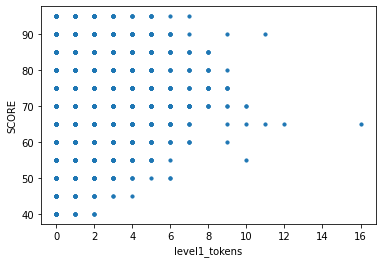

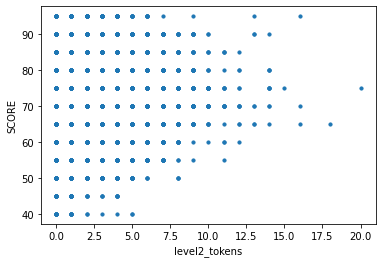

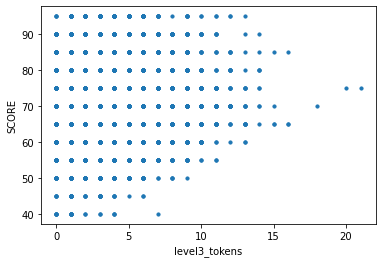

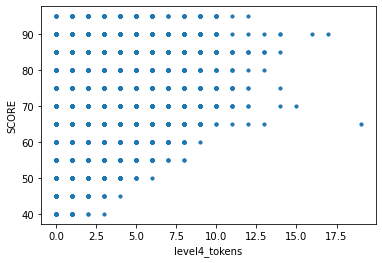

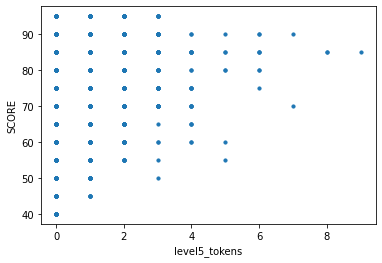

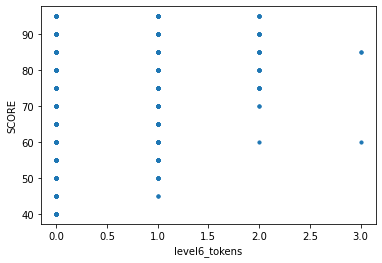

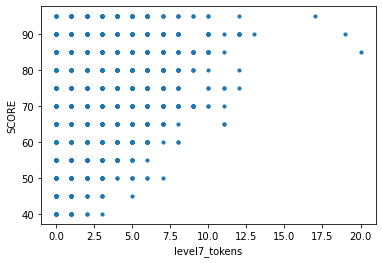

In [20]:
features_set1 = dataframe.copy()
features_set1
features_set1.plot.scatter(x = 'level1_tokens', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'level2_tokens', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'level3_tokens', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'level4_tokens', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'level5_tokens', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'level6_tokens', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'level7_tokens', y = 'SCORE', s=10)

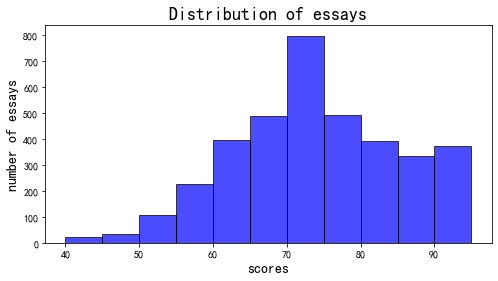

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib正常显示中文和负号
plt.figure(figsize=(8, 4))
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
x_list = dataframe['SCORE'].values.tolist()
plt.hist(x_list, bins=11,facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("scores",fontsize=14)
# 显示纵轴标签
plt.ylabel("number of essays",fontsize=14)
# 显示图标题
plt.title("Distribution of essays",fontsize=18)
plt.show()


In [22]:
dataframe['Connective_ratio']= dataframe['connective_numbers']/dataframe['Tokens']
dataframe

,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,words_detailed,connective_numbers,level1_tokens,level2_tokens,level3_tokens,level4_tokens,level5_tokens,level6_tokens,level7_tokens,Connective_ratio
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,"[为了, 而, 便, 如, 为了, 为了, 便, 因, 与, 甚至, 像, 由, 就, 像,...",23,0,2,7,4,2,0,3,0.067251
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,"[及, 并, 及, 由于, 及, 而, 由, 为, 与, 及]",10,0,0,0,3,0,0,5,0.051546
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,"[便, 虽然, 但, 就, 为, 与, 不是, 还是, 因此, 与, 便, 每当, 加以, ...",22,0,4,5,5,3,0,4,0.072848
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,"[不是, 只是, 因此, 和, 如果, 由, 偏偏, 要不然, 为, 而, 但, 为, 首先...",23,1,0,4,3,1,1,8,0.084249
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,"[既, 与其, 既, 为, 但, 另外, 如果, 于是, 另外, 所以, 只有, 才, 还是...",18,1,1,5,4,1,0,4,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,"[但是, 和, 但是, 但, 但, 虽然, 还是, 虽然, 但是]",9,1,5,1,0,0,0,2,0.054545
3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,"[就是, 因为, 以, 又, 所以, 而且, 但, 由于, 和, 一方面, 一方面, 还是,...",17,1,3,5,1,1,0,5,0.139344
3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,"[与, 如果, 所以, 和, 又, 而, 还有, 而, 而且, 但, 然后, 为, 不及]",13,1,1,4,3,0,0,3,0.107438
3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,"[虽, 但是, 如, 由于, 而, 如果, 和, 就, 但是, 不仅, 甚至, 由, 以, ...",28,2,10,4,8,0,0,2,0.133971


<AxesSubplot:xlabel='Connective_ratio', ylabel='SCORE'>

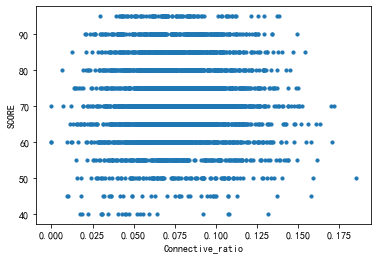

In [23]:
features_set1 = dataframe.copy()
features_set1.plot.scatter(x = 'Connective_ratio', y = 'SCORE', s=10)

In [24]:
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(dataframe['connective_numbers'], dataframe['SCORE'], test_size = 0.2)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
print(X_train.shape,X_test.shape)

(2934, 1) (734, 1)


In [25]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred = linear_regressor.predict(X_test)

In [26]:
a=linear_regressor.intercept_
b=linear_regressor.coef_
print(a,b)

62.16828650855031 [0.5887337]


In [27]:
linear_regressor.score(X_test,y_test)


0.07802041354502265

In [28]:
dataframe.to_csv(r'C:\Users\dawns\Desktop\Master thesis\data\Features_level.csv')

In [29]:
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(dataframe['Connective_ratio'], dataframe['SCORE'], test_size = 0.2)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
print(X_train.shape,X_test.shape)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred = linear_regressor.predict(X_test)


(2934, 1) (734, 1)


In [30]:
linear_regressor.score(X_test,y_test)

-0.0009364104704034926

In [31]:
dataframe['Connective_ratio']= dataframe['connective_numbers']/dataframe['Tokens']
dataframe

,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,words_detailed,connective_numbers,level1_tokens,level2_tokens,level3_tokens,level4_tokens,level5_tokens,level6_tokens,level7_tokens,Connective_ratio
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,"[为了, 而, 便, 如, 为了, 为了, 便, 因, 与, 甚至, 像, 由, 就, 像,...",23,0,2,7,4,2,0,3,0.067251
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,"[及, 并, 及, 由于, 及, 而, 由, 为, 与, 及]",10,0,0,0,3,0,0,5,0.051546
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,"[便, 虽然, 但, 就, 为, 与, 不是, 还是, 因此, 与, 便, 每当, 加以, ...",22,0,4,5,5,3,0,4,0.072848
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,"[不是, 只是, 因此, 和, 如果, 由, 偏偏, 要不然, 为, 而, 但, 为, 首先...",23,1,0,4,3,1,1,8,0.084249
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,"[既, 与其, 既, 为, 但, 另外, 如果, 于是, 另外, 所以, 只有, 才, 还是...",18,1,1,5,4,1,0,4,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,"[但是, 和, 但是, 但, 但, 虽然, 还是, 虽然, 但是]",9,1,5,1,0,0,0,2,0.054545
3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,"[就是, 因为, 以, 又, 所以, 而且, 但, 由于, 和, 一方面, 一方面, 还是,...",17,1,3,5,1,1,0,5,0.139344
3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,"[与, 如果, 所以, 和, 又, 而, 还有, 而, 而且, 但, 然后, 为, 不及]",13,1,1,4,3,0,0,3,0.107438
3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,"[虽, 但是, 如, 由于, 而, 如果, 和, 就, 但是, 不仅, 甚至, 由, 以, ...",28,2,10,4,8,0,0,2,0.133971


In [2]:
dataframe = pd.read_csv(r'C:\Users\dawns\Desktop\Master thesis\data\Features_level.csv',index_col=None, header=0)

In [33]:
data=dataframe[['level5_tokens','level6_tokens','level7_tokens','SCORE']].copy()

In [34]:
data['high_level']=data['level7_tokens']+data['level5_tokens']+data['level6_tokens']
data

,level5_tokens,level6_tokens,level7_tokens,SCORE,high_level
0,2,0,3,90,5
1,0,0,5,80,5
2,3,0,4,80,7
3,1,1,8,95,10
4,1,0,4,85,5
...,...,...,...,...,...
3663,0,0,2,60,2
3664,1,0,5,55,6
3665,0,0,3,45,3
3666,0,0,2,60,2


In [35]:
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(data['high_level'], data['SCORE'], test_size = 0.2)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
print(X_train.shape,X_test.shape)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred = linear_regressor.predict(X_test)


(2934, 1) (734, 1)


In [36]:
linear_regressor.score(X_test,y_test)

0.12037725828318335

In [37]:
data1=dataframe[['level1_tokens','level2_tokens','level3_tokens','level4_tokens','SCORE']].copy()

In [38]:
data1['primary_level']=data1['level1_tokens']+data1['level2_tokens']+data1['level3_tokens']+data1['level4_tokens']

In [39]:
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(data1['primary_level'], data1['SCORE'], test_size = 0.2)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
#print(X_train.shape,X_test.shape)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred = linear_regressor.predict(X_test)
linear_regressor.score(X_test,y_test)

(2934, 1) (734, 1)


In [40]:
linear_regressor.score(X_test,y_test)

0.04780454818372415

In [43]:
len(dataframe['CONTENT_NEW'][0])

636

In [46]:
dataframe['primary_level']=dataframe['level1_tokens']+dataframe['level2_tokens']+dataframe['level3_tokens']+dataframe['level4_tokens']


In [47]:
dataframe['high_level']=dataframe['level7_tokens']+dataframe['level5_tokens']+dataframe['level6_tokens']
dataframe

,Unnamed: 0,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,words_detailed,connective_numbers,level1_tokens,level2_tokens,level3_tokens,level4_tokens,level5_tokens,level6_tokens,level7_tokens,Connective_ratio,primary_level,high_level
0,0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,"['为了', '而', '便', '如', '为了', '为了', '便', '因', '与...",23,0,2,7,4,2,0,3,0.067251,13,5
1,1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,"['及', '并', '及', '由于', '及', '而', '由', '为', '与',...",10,0,0,0,3,0,0,5,0.051546,3,5
2,2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,"['便', '虽然', '但', '就', '为', '与', '不是', '还是', '因...",22,0,4,5,5,3,0,4,0.072848,14,7
3,3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,"['不是', '只是', '因此', '和', '如果', '由', '偏偏', '要不然'...",23,1,0,4,3,1,1,8,0.084249,8,10
4,4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,"['既', '与其', '既', '为', '但', '另外', '如果', '于是', '...",18,1,1,5,4,1,0,4,0.096774,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,"['但是', '和', '但是', '但', '但', '虽然', '还是', '虽然', ...",9,1,5,1,0,0,0,2,0.054545,7,2
3664,3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,"['就是', '因为', '以', '又', '所以', '而且', '但', '由于', ...",17,1,3,5,1,1,0,5,0.139344,10,6
3665,3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,"['与', '如果', '所以', '和', '又', '而', '还有', '而', '而...",13,1,1,4,3,0,0,3,0.107438,9,3
3666,3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,"['虽', '但是', '如', '由于', '而', '如果', '和', '就', '但...",28,2,10,4,8,0,0,2,0.133971,24,2


In [48]:
dataframe['primary_level'].sum() 

46254

In [49]:
dataframe['high_level'].sum() 

10576

In [55]:
for i in dataframe['CONTENT_NEW'].index:
    dataframe['char_num'][i] = len(dataframe['CONTENT_NEW'][i])

C:\Users\dawns\AppData\Local\Temp/ipykernel_15752/1135390288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['char_num'][i] = len(dataframe['CONTENT_NEW'][i])


In [25]:
def preprocessing_sentence(content):
    words = jieba.cut(str(content).strip())
    words = re.sub('\W*', '',''.join(words))
    words = list(jieba.cut(words))
    return ' '.join(words)

In [26]:
dataframe['pre']=dataframe['WORDCUT']
#pre= df_data['CONTENT_NEW'].apply(lambda content: preprocessing_sentence(content))
#pre
dataframe['pre']=dataframe['pre'].apply(lambda content: preprocessing_sentence(content))
dataframe['pre']

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dawns\AppData\Local\Temp\jieba.cache
Loading model cost 0.771 seconds.
Prefix dict has been built successfully.


0       记得 当年 年纪 小 家中 兄弟姐妹 数十 多人 我 排行 倒 最 第二 父母亲 为了 养起...
1       一封 求职信 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快乐 家庭 旅游 公司...
2       我 的 外婆 对 我 的 影响 非常 大 从小 我 父母 便 将 我 交给 外婆 带 他们 ...
3       安乐死 究竟 可不 可取 在 二十世纪 的 今天 安乐死 已 不是 什么 新 话题 在 不同...
4       关于 安乐死 这个 问题 近来 引起 了 广泛 的 讨论 有些 人 认为 一个 人 既 既身...
                              ...                        
3663    我 的 看法 是 不 挨饿 是 最 重要 的 但是 认为 古代 没有 化肥 和 农药 大都 ...
3664    目前 在 超市 里 常见 的 就是 绿色食品 因为 以 吃 绝色 食品 即能 保护环境 又 ...
3665    再谈 绿色食品 与 饥饿 绝色 食品 把 用 未经 污染 的 农产品 加工 的 食品 如果 ...
3666    地球 在 苦 你 听不见 吗 在 这 世界 里 虽 有 一些 很 发达 食物 丰富 的 国家...
3667    我 觉得 这种 问题 每个 国家 之间 上量 才 决定 的 问题 认为 是 绿色食品 因为 ...
Name: pre, Length: 3668, dtype: object

In [34]:
dataframe

,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,words_detailed,connective_numbers,level1_tokens,...,level4_tokens,level5_tokens,level6_tokens,level7_tokens,Connective_ratio,primary_level,high_level,char_num,connective_SCORE,pre
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,"['为了', '而', '便', '如', '为了', '为了', '便', '因', '与...",23,0,...,4,2,0,3,0.067251,13,5,636,2.984263,记得 当年 年纪 小 家中 兄弟姐妹 数十 多人 我 排行 倒 最 第二 父母亲 为了 养起...
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,"['及', '并', '及', '由于', '及', '而', '由', '为', '与',...",10,0,...,3,0,0,5,0.051546,3,5,403,2.434391,一封 求职信 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快乐 家庭 旅游 公司...
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,"['便', '虽然', '但', '就', '为', '与', '不是', '还是', '因...",22,0,...,5,3,0,4,0.072848,14,7,570,3.791400,我 的 外婆 对 我 的 影响 非常 大 从小 我 父母 便 将 我 交给 外婆 带 他们 ...
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,"['不是', '只是', '因此', '和', '如果', '由', '偏偏', '要不然'...",23,1,...,3,1,1,8,0.084249,8,10,588,3.982972,安乐死 究竟 可不 可取 在 二十世纪 的 今天 安乐死 已 不是 什么 新 话题 在 不同...
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,"['既', '与其', '既', '为', '但', '另外', '如果', '于是', '...",18,1,...,4,1,0,4,0.096774,11,5,364,2.989940,关于 安乐死 这个 问题 近来 引起 了 广泛 的 讨论 有些 人 认为 一个 人 既 既身...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,"['但是', '和', '但是', '但', '但', '虽然', '还是', '虽然', ...",9,1,...,0,0,0,2,0.054545,7,2,300,0.989657,我 的 看法 是 不 挨饿 是 最 重要 的 但是 认为 古代 没有 化肥 和 农药 大都 ...
3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,"['就是', '因为', '以', '又', '所以', '而且', '但', '由于', ...",17,1,...,1,1,0,5,0.139344,10,6,243,2.524116,目前 在 超市 里 常见 的 就是 绿色食品 因为 以 吃 绝色 食品 即能 保护环境 又 ...
3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,"['与', '如果', '所以', '和', '又', '而', '还有', '而', '而...",13,1,...,3,0,0,3,0.107438,9,3,227,2.129864,再谈 绿色食品 与 饥饿 绝色 食品 把 用 未经 污染 的 农产品 加工 的 食品 如果 ...
3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,"['虽', '但是', '如', '由于', '而', '如果', '和', '就', '但...",28,2,...,8,0,0,2,0.133971,24,2,396,3.811411,地球 在 苦 你 听不见 吗 在 这 世界 里 虽 有 一些 很 发达 食物 丰富 的 国家...


In [35]:
dataframe.to_csv(r'C:\Users\dawns\Desktop\Master thesis\data\Features_level.csv')

In [36]:
dataframe

,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,words_detailed,connective_numbers,level1_tokens,...,level4_tokens,level5_tokens,level6_tokens,level7_tokens,Connective_ratio,primary_level,high_level,char_num,connective_SCORE,pre
0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,"['为了', '而', '便', '如', '为了', '为了', '便', '因', '与...",23,0,...,4,2,0,3,0.067251,13,5,636,2.984263,记得 当年 年纪 小 家中 兄弟姐妹 数十 多人 我 排行 倒 最 第二 父母亲 为了 养起...
1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,"['及', '并', '及', '由于', '及', '而', '由', '为', '与',...",10,0,...,3,0,0,5,0.051546,3,5,403,2.434391,一封 求职信 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快乐 家庭 旅游 公司...
2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,"['便', '虽然', '但', '就', '为', '与', '不是', '还是', '因...",22,0,...,5,3,0,4,0.072848,14,7,570,3.791400,我 的 外婆 对 我 的 影响 非常 大 从小 我 父母 便 将 我 交给 外婆 带 他们 ...
3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,"['不是', '只是', '因此', '和', '如果', '由', '偏偏', '要不然'...",23,1,...,3,1,1,8,0.084249,8,10,588,3.982972,安乐死 究竟 可不 可取 在 二十世纪 的 今天 安乐死 已 不是 什么 新 话题 在 不同...
4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,"['既', '与其', '既', '为', '但', '另外', '如果', '于是', '...",18,1,...,4,1,0,4,0.096774,11,5,364,2.989940,关于 安乐死 这个 问题 近来 引起 了 广泛 的 讨论 有些 人 认为 一个 人 既 既身...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,"['但是', '和', '但是', '但', '但', '虽然', '还是', '虽然', ...",9,1,...,0,0,0,2,0.054545,7,2,300,0.989657,我 的 看法 是 不 挨饿 是 最 重要 的 但是 认为 古代 没有 化肥 和 农药 大都 ...
3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,"['就是', '因为', '以', '又', '所以', '而且', '但', '由于', ...",17,1,...,1,1,0,5,0.139344,10,6,243,2.524116,目前 在 超市 里 常见 的 就是 绿色食品 因为 以 吃 绝色 食品 即能 保护环境 又 ...
3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,"['与', '如果', '所以', '和', '又', '而', '还有', '而', '而...",13,1,...,3,0,0,3,0.107438,9,3,227,2.129864,再谈 绿色食品 与 饥饿 绝色 食品 把 用 未经 污染 的 农产品 加工 的 食品 如果 ...
3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,"['虽', '但是', '如', '由于', '而', '如果', '和', '就', '但...",28,2,...,8,0,0,2,0.133971,24,2,396,3.811411,地球 在 苦 你 听不见 吗 在 这 世界 里 虽 有 一些 很 发达 食物 丰富 的 国家...


In [9]:
# correlation test 相关性检测
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def correlation(c):
    X_train, X_test, y_train, y_test = train_test_split(c, dataframe['SCORE'], test_size = 0.2)
    X_train=X_train.values.reshape(-1,1)
    X_test=X_test.values.reshape(-1,1)
    #print(X_train.shape,X_test.shape)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train,y_train)
    y_pred = linear_regressor.predict(X_test)
    print(c.name,':',linear_regressor.score(X_test,y_test))  #r-squared，介于0-1之间，回归拟合效果越好，0超过0.8则拟合较好
    print('===================================')
    


In [10]:
F=['LEVEL','Tokens','level1_tokens','level2_tokens','level3_tokens','level4_tokens','level5_tokens','level6_tokens','level7_tokens','char_num','high_level','primary_level','Connective_ratio','connective_numbers']
for f in F:
    c=dataframe[f]
    correlation(c)


LEVEL : 0.8331195300125049
Tokens : 0.24395846422364065
level1_tokens : -0.01956656374428234
level2_tokens : 0.0069914158173705054
level3_tokens : 0.004247022384445742
level4_tokens : 0.05833950135758281
level5_tokens : 0.0554493802919529
level6_tokens : 0.013540763977191617
level7_tokens : 0.08376901802739722
char_num : 0.3281370421375952
high_level : 0.14387839917666845
primary_level : 0.05125584256608151
Connective_ratio : -0.002408120938873992
connective_numbers : 0.1363226635525312


In [103]:
#correlation(dataframe['char_num'])


In [36]:
from scipy.stats import pearsonr
# 皮尔逊相关系数 pearson，衡量x，y之间线性相关关系
y=  dataframe['SCORE']
def pearson(p):
    pccs = pearsonr(p, y)
    print(p.name, ':',pccs)
    print('===================================')
    
    

In [37]:
R=['LEVEL','Tokens','level1_tokens','level2_tokens','level3_tokens','level4_tokens','level5_tokens','level6_tokens','level7_tokens','char_num','high_level','primary_level','Connective_ratio','connective_numbers','connective_SCORE']
for r in R:
    r=dataframe[r]
    pearson(r)

LEVEL : (0.9144451233208059, 0.0)
Tokens : (0.5043425594999025, 5.770966735949241e-236)
level1_tokens : (0.05522779890803393, 0.0008191807193974469)
level2_tokens : (0.052118714678189376, 0.0015907976166050467)
level3_tokens : (0.05239227174991609, 0.0015025793849715817)
level4_tokens : (0.2935944837468477, 7.815743394225957e-74)
level5_tokens : (0.20336840377442988, 1.5293889527095496e-35)
level6_tokens : (0.14825059405020397, 1.788683855022986e-19)
level7_tokens : (0.3107215230141122, 6.3165405932516886e-83)
char_num : (0.5658987848832971, 1.182956298268483e-309)
high_level : (0.35538697295078486, 1.217725654248092e-109)
primary_level : (0.1971942947783289, 1.773285918761767e-33)
Connective_ratio : (0.029787687753399305, 0.07125524071803335)
connective_numbers : (0.3401455035165406, 5.0733504441389e-100)
connective_SCORE : (0.3969478822720724, 1.0621787934638892e-138)


In [4]:
dataframe['connective_SCORE'] = dataframe['level1_tokens']
#dataframe['connective_SCORE'] = dataframe['level1_tokens'] * 1 + dataframe['level2_tokens'] * 1 + dataframe['level3_tokens'] * 1 +dataframe['level4_tokens'] * 20 + dataframe['level5_tokens'] * 18 +dataframe['level6_tokens'] * 15 +dataframe['level7_tokens'] * 6
dataframe['connective_SCORE'] = dataframe['level1_tokens'] * 0.05522779890803393 + dataframe['level2_tokens'] * 0.052118714678189376 + dataframe['level3_tokens'] * 0.05239227174991609 +dataframe['level4_tokens'] * 0.2935944837468477+dataframe['level5_tokens'] * 0.20336840377442988+dataframe['level6_tokens'] * 0.14825059405020397+dataframe['level7_tokens'] * 0.3107215230141122

In [5]:
dataframe

,Unnamed: 0.1,Unnamed: 0,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,words_detailed,...,level3_tokens,level4_tokens,level5_tokens,level6_tokens,level7_tokens,Connective_ratio,primary_level,high_level,char_num,connective_SCORE
0,0,0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,"['为了', '而', '便', '如', '为了', '为了', '便', '因', '与...",...,7,4,2,0,3,0.067251,13,5,636,2.984263
1,1,1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,"['及', '并', '及', '由于', '及', '而', '由', '为', '与',...",...,0,3,0,0,5,0.051546,3,5,403,2.434391
2,2,2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,"['便', '虽然', '但', '就', '为', '与', '不是', '还是', '因...",...,5,5,3,0,4,0.072848,14,7,570,3.791400
3,3,3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,"['不是', '只是', '因此', '和', '如果', '由', '偏偏', '要不然'...",...,4,3,1,1,8,0.084249,8,10,588,3.982972
4,4,4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,"['既', '与其', '既', '为', '但', '另外', '如果', '于是', '...",...,5,4,1,0,4,0.096774,11,5,364,2.989940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3663,3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,"['但是', '和', '但是', '但', '但', '虽然', '还是', '虽然', ...",...,1,0,0,0,2,0.054545,7,2,300,0.989657
3664,3664,3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,"['就是', '因为', '以', '又', '所以', '而且', '但', '由于', ...",...,5,1,1,0,5,0.139344,10,6,243,2.524116
3665,3665,3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,"['与', '如果', '所以', '和', '又', '而', '还有', '而', '而...",...,4,3,0,0,3,0.107438,9,3,227,2.129864
3666,3666,3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,"['虽', '但是', '如', '由于', '而', '如果', '和', '就', '但...",...,4,8,0,0,2,0.133971,24,2,396,3.811411


In [39]:
# Tokenization
def preprocessing_sentence(content):
    words = jieba.cut(str(content).strip())
    words = re.sub('\W*', '',''.join(words))
    words = list(jieba.cut(words))
    return ' '.join(words)
pre= dataframe['CONTENT_NEW'].apply(lambda content: preprocessing_sentence(content))
vectorizer = TfidfVectorizer()
vectorizer.fit(pre)
vector = vectorizer.transform(pre)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dawns\AppData\Local\Temp\jieba.cache
Loading model cost 0.674 seconds.
Prefix dict has been built successfully.


In [64]:
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def preprocessing_sentence(content):
    words = jieba.cut(str(content).strip())
    words = re.sub('\W*', '',''.join(words))
    words = list(jieba.cut(words))
    return ' '.join(words)
pre= dataframe['CONTENT_NEW'].apply(lambda content: preprocessing_sentence(content))
X_train, X_test, y_train, y_test = train_test_split(pre, dataframe['connective_SCORE'], test_size = 0.2)
tf = TfidfVectorizer()
X_train = tf.fit_transform(X_train).toarray()
X_test = tf.transform(X_test).toarray()
#print(X_train.shape,X_test.shape)
regr = RandomForestRegressor(max_depth=50, random_state=0)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, random_state=0)

In [57]:
len(X_test[0])

31791

In [63]:
#y_pred = linear_regressor.predict(X_test)
print('TRAINscore',':',regr.score(X_train,y_train))  #r-squared，介于0-1之间，回归拟合效果越好，0超过0.8则拟合较好
print('TESTscore',':',regr.score(X_test,y_test))
#print('y_pred',':',linear_regressor.predict(X_train))
print('===================================')
    

TRAINscore : 0.9083764863225328
TESTscore : 0.34921364627135365


In [65]:
#y_pred = linear_regressor.predict(X_test)
print('TRAINscore',':',regr.score(X_train,y_train))  #r-squared，介于0-1之间，回归拟合效果越好，0超过0.8则拟合较好
print('TESTscore',':',regr.score(X_test,y_test))
#print('y_pred',':',linear_regressor.predict(X_train))
print('===================================')

TRAINscore : 0.9150041424664077
TESTscore : 0.379196417338026


In [3]:
dataframe

,Unnamed: 0.1,Unnamed: 0,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,words_detailed,...,level2_tokens,level3_tokens,level4_tokens,level5_tokens,level6_tokens,level7_tokens,Connective_ratio,primary_level,high_level,char_num
0,0,0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,"['为了', '而', '便', '如', '为了', '为了', '便', '因', '与...",...,2,7,4,2,0,3,0.067251,13,5,636
1,1,1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,"['及', '并', '及', '由于', '及', '而', '由', '为', '与',...",...,0,0,3,0,0,5,0.051546,3,5,403
2,2,2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,"['便', '虽然', '但', '就', '为', '与', '不是', '还是', '因...",...,4,5,5,3,0,4,0.072848,14,7,570
3,3,3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,"['不是', '只是', '因此', '和', '如果', '由', '偏偏', '要不然'...",...,0,4,3,1,1,8,0.084249,8,10,588
4,4,4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,"['既', '与其', '既', '为', '但', '另外', '如果', '于是', '...",...,1,5,4,1,0,4,0.096774,11,5,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3663,3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,"['但是', '和', '但是', '但', '但', '虽然', '还是', '虽然', ...",...,5,1,0,0,0,2,0.054545,7,2,300
3664,3664,3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,"['就是', '因为', '以', '又', '所以', '而且', '但', '由于', ...",...,3,5,1,1,0,5,0.139344,10,6,243
3665,3665,3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,"['与', '如果', '所以', '和', '又', '而', '还有', '而', '而...",...,1,4,3,0,0,3,0.107438,9,3,227
3666,3666,3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,"['虽', '但是', '如', '由于', '而', '如果', '和', '就', '但...",...,10,4,8,0,0,2,0.133971,24,2,396


In [7]:
dataframe = pd.read_csv(r'C:\Users\dawns\Desktop\Master thesis\data\Features_level.csv',index_col=None, header=0)

In [8]:
dataframe

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,TOPIC,CONTENT_NEW,CONTENT,WORDCUT,SCORE,LEVEL,Tokens,...,level3_tokens,level4_tokens,level5_tokens,level6_tokens,level7_tokens,Connective_ratio,primary_level,high_level,char_num,connective_SCORE
0,0,0,0,记对我影响最大的一个人,记得当年年纪小，家中兄弟姐妹数十多人。我排行倒最第二。父母亲为了养起这头家，日夜往外奔波劳累...,记得当年年纪小，家中兄弟姐妹{CD数}十多人。我排行倒数{CC最后}第二。父母亲为了养家{C...,记得 当年 年纪 小 ， 家中 兄弟姐妹 数十 多人 。 我 排行 倒 最 第二 。 父母亲...,90,3,342,...,7,4,2,0,3,0.067251,13,5,636,2.984263
1,1,1,1,一封求职信,《一封求职信》×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负责人广东省李文先...,[BD《]一封求职信[BD》]×××揭阳县西门外磐东镇肇沟乡广东省李文先生快乐家庭旅游公司负...,《 一封 求职信 》 × × × 揭阳县 西 门外 磐 东镇肇沟 乡 广东省 李文 先生 快...,80,3,194,...,0,3,0,0,5,0.051546,3,5,403,2.434391
2,2,2,2,记对我影响最大的一个人,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我的外婆对我的影响非常大。从小，我父母便将我交给外婆带。他们是上班一族，平日无法照顾我。虽然...,我 的 外婆 对 我 的 影响 非常 大 。 从小 ， 我 父母 便 将 我 交给 外婆 带...,80,3,302,...,5,5,3,0,4,0.072848,14,7,570,3.791400
3,3,3,3,如何看待“安乐死”,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，已曾有人...,“安乐死”究竟可不可取？在二十世纪的今天，“安乐死”已不是什么新话题。在不同的国家，也{CC...,“ 安乐死 ” 究竟 可不 可取 ？ 在 二十世纪 的 今天 ， “ 安乐死 ” 已 不是 ...,95,3,273,...,4,3,1,1,8,0.084249,8,10,588,3.982972
4,4,4,4,如何看待“安乐死”,关于安乐死这个问题，近来引起了广泛的讨论，有些人认为：一个人既既身罹不治之症，与其留在世上饱...,关[F關]于[F於]安乐死这[F這]个问题[F題]，近来[F來]引起了广泛的讨论。[BC，]...,关于 安乐死 这个 问题 ， 近来 引起 了 广泛 的 讨论 ， 有些 人 认为 ： 一个 ...,85,3,186,...,5,4,1,0,4,0.096774,11,5,364,2.989940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,3663,3663,3663,绿色食品与饥饿,我的看法是不挨饿是最重要的。但是认为古代没有化肥和农药。大都数的农作物对身休无害的。但是很多...,{CP我[C]的看法是不挨饿[C]是最重要的。但是[C]认为古代[C]没有化肥和农药。大多[...,我 的 看法 是 不 挨饿 是 最 重要 的 。 但是 认为 古代 没有 化肥 和 农药 。...,60,1,165,...,1,0,0,0,2,0.054545,7,2,300,0.989657
3664,3664,3664,3664,绿色食品与饥饿,"目前，在超市里常见的就是绿色食品.因为以吃绝色食品即能保护环境,又对身体有好处,所以人们对绝...",目前，在超市里常见的就是[BQ“]绿色食品[BQ”]。[BC.]因为{CD以}吃[BQ“]绿...,目前 ， 在 超市 里 常见 的 就是 绿色食品 . 因为 以 吃 绝色 食品 即能 保护环...,55,1,122,...,5,1,1,0,5,0.139344,10,6,243,2.524116
3665,3665,3665,3665,绿色食品与饥饿,再谈“绿色食品与饥饿”绝色食品“把用未经污染的农产品加工的食品。如果人们担心农作物会受到的化...,再谈“绿色食品与饥饿”绿[B绝]色食品“把用未经污染的农产品加工的食品[BQ”]{CJs}。...,再谈 “ 绿色食品 与 饥饿 ” 绝色 食品 “ 把 用 未经 污染 的 农产品 加工 的 ...,45,1,121,...,4,3,0,0,3,0.107438,9,3,227,2.129864
3666,3666,3666,3666,绿色食品与饥饿,地球在苦，你听不见吗？在这世界里虽有一些很发达、食物丰富的国家、但是如朝鲜那样，由于没有饮食...,地球在哭[B苦]，你听不见吗？{CP在这世界里虽有一些很发达、食物丰富的国家，[BC、]但是...,地球 在 苦 ， 你 听不见 吗 ？ 在 这 世界 里 虽 有 一些 很 发达 、 食物 丰...,60,1,209,...,4,8,0,0,2,0.133971,24,2,396,3.811411


<AxesSubplot:xlabel='char_num', ylabel='SCORE'>

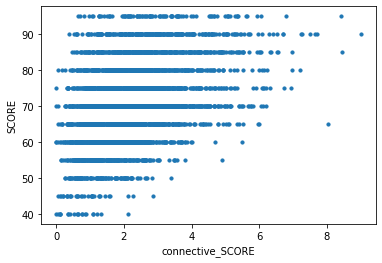

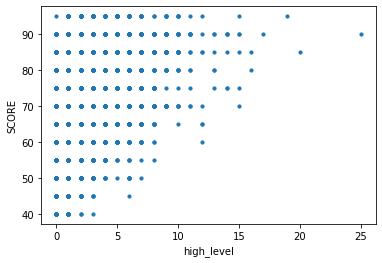

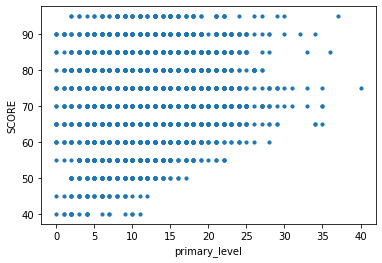

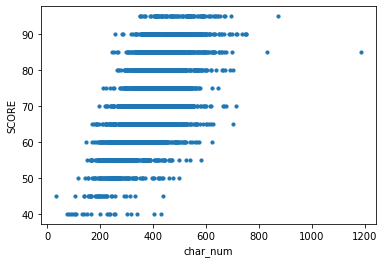

In [20]:
features_set1 = dataframe.copy()
features_set1.plot.scatter(x = 'connective_SCORE', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'high_level', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'primary_level', y = 'SCORE', s=10)
features_set1.plot.scatter(x = 'char_num', y = 'SCORE', s=10)
